Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [1]:
NOM = "Martinez"
PRENOM = "Maud"
GROUPE = "3"
DATE = "27/03/2019"

---

### L1-S2 : UE Simulations numériques

# SEANCE 8 : Intégrales

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print('je suis execute')

je suis execute


## Calculs d'intégrales
On souhaite **évaluer numériquement la valeur de l'intégrale** d'une fonction $f$ entre deux points connus, $a$ et $b$. 
* la primitive $F$ de $f$ est connue analytiquement $\rightarrow$ simple évaluation de la fonction $F$ en $a$ et $b$
* la fonction $f$ est échantillonnée en un nombre restreint de points $\rightarrow$ plusieurs outils sont à notre disposition.


La seconde approche va nous être particulièrement utile en méthodes numériques. Mais n'oubliez pas la première ! Si une intégrale peut être calculée de manière analytique, faîtes le ! Ce sera (souvent) plus rapide et toujours plus précis. 


La comparaison entre le calcul analytique et numérique est aussi un outil essentiel pour vérifier la validité de vos algorithmes et évaluer l'erreur induite par vos approximations.

Ici je peux mettre des notes pour le prof


La fonction $f$ est échantillonnée en un nombre restreint de points $\rightarrow$ plusieurs outils sont à notre disposition, par exemple :
* interpolation polynomiale entre points également espacés, puis intégration $\rightarrow$ **formules de Newton - Cotes** (\textit{simple et robuste - standard pour une fonction facile à évaluer*)
* "optimisation'' des points où sont évalués la fonction $\rightarrow$ **quadrature Gaussienne** (\textit{plus de liberté - plus difficile d'estimer l'erreur commise*)
* échantillonage aléatoire de la fonction  $\rightarrow$ **calcul "Monte-Carlo''** (\textit{particulièrement utile à N-dimensions*)


**Cette séance : formules de Newton - Cotes + critères d'erreur.**

## Formules de Newton - Cotes
$f(x)$ est échantillonnée entre $a$ et $b$. On souhaite estimer $\int_a^b f(x){\rm d}x$.

* ordre 0 : on approxime $f$ par une fonction en escalier évaluée en un point par sous intervalle $\rightarrow$ Somme de Riemmann
* ordre 1 : on approxime $f$ par une fonction affine évaluée en deux points par sous intervalle $\rightarrow$ Méthode des trapèzes
* ordre 2 : on approxime $f$ par une parabole évaluée en trois points par sous intervalle $\rightarrow$ Méthode de Simpson
Ces méthodes ne sont rigoureusement exactes que pour les polynômes d'ordre associé $\rightarrow$ **erreur commise ?**



| ordre 0: rectangles | ordre 1: trapèzes | ordres 2: paraboles |
|:-----|:----|:-----|
| <img align="left" src="plots/681px-Integration_num_rectangles.png" /> | <img align="left"  src="plots/681px-Integration_num_trapezes.png" /> | <img align="left"  src="plots/681px-Integration_num_Simpson.png"/>

## Newton - Cotes - Ordre 0 : somme de Riemann


On considère d'abord deux points $[a,b]$ espacés par un pas $h=b-a$. Pour deux points seulement, la formule de Riemann donne  $\int_a^b f(x){\rm d}x \simeq I$ avec
\begin{equation}
I = h \times f(\xi)\quad {\rm avec\ } \xi\in[a,b]
\end{equation}
$\xi$ est un point d'abscisse quelconque entre les deux bornes $a$ et $b$.
<img src="plots/681px-Integration_num_rectangles.png" width="20%"/>

**La position de $\xi$ est cruciale !** Il suffit d'un D.L. pour le voir: 
\begin{equation}
f(x) = f(\xi) + f'(\xi)\times(x-\xi) + f''(\xi)\times\frac{(x-\xi)^2}{2!} + \ldots
\end{equation}



**Si on prend $\xi = a$ ou $\xi =b$,**  $\int_a^b f(x){\rm d}x - I = \frac{h^2}{2}f'(\xi)  + \ldots$
soit une **erreur en $O(h^2f')$** (notation abusive mais bien pratique)

**Si on prend $\xi = \frac{a+b}{2}$,**  $\int_a^b f(x){\rm d}x - I = \frac{h^3}{24}f''(\xi)  + \ldots$
soit une **erreur en $O(h^3f'')$**




Généralisons à $n$ points avec un pas $h=\frac{b-a}{n}$. Si on fait la **somme à gauche} ($x_i = a + i\times h$) **ou à droite} ($x_i = a + (i+1)\times h$) :
\begin{align}
\int_a^b f(x){\rm d}x &= \sum_{i=0}^{n-1}h f_i + n\times O(h^2f')\nonumber
&= \sum_{i=0}^{n-1} hf(x_i)  + O\left(\frac{(b-a)^2f'}{n}\right)\nonumber
\end{align}

Au contraire, si on fait la **somme au milieu**
($x_i = a + (i+\frac{1}{2})\times h$)
\begin{align}
\int_a^b f(x){\rm d}x &= \sum_{i=0}^{n-1} h f(x_i) + n\times O(h^3f'')
&= \sum_{i=0}^{n-1}h f(x_i) + O\left(\frac{(b-a)^3f''}{n^2}\right)
\end{align}


| $\xi=a$ | $\xi=b$ | $\xi=(a+b)/2$ |
|:-----|:----|:-----|
| <img  title="up" src="plots/Riemann_sum_leftbox.gif"  /> | <img src="plots/Riemann_sum_rightbox.gif" /> | <img  src="plots/Riemann_sum_middlebox.gif"  />


## Newton - Cotes - Ordre 1 : méthode des trapèzes
La **méthode des trapèzes** consiste à approximer la fonction par des **segments de droite sur des sous-intervalles.}
Pour deux points, à l'aide le la formule de l'aire du trapèze l'intégrale devient:
$\int_a^b f(x){\rm d}x = h\times\frac{f(a)+f(b)}{2} + O(h^3f'')$

*Noter que l'erreur est du même ordre que celle obtenue pour la somme de Riemann au milieu.*

<img align="center" src="plots/681px-Integration_num_trapezes.png" width="30%">

En généralisant à $n$ points, pour $x_i = a + i\times h$, on obtient

$\int_a^b f(x){\rm d}x = h\times\left(\frac{f_0}{2} + f_1 + f_2 + \ldots + f_{n-1} + \frac{f_{n}}{2}\right) + O\left(\frac{(b-a)^3f''}{n^2}\right)$
en notant $f_i=f(x_i)$.

## Newton - Cotes - Ordre 2 : méthode de Simpson

La **méthode de Simpson** consiste à approximer la fonction par des **morceaux de paraboles} (nombre impair de points !)
Pour trois points, l'intégrale devient:
$\int_a^b f(x){\rm d}x = \frac{b-a}{2}\times\left(\frac{1}{3}f(a) + \frac{4}{3}f(\frac{a+b}{2}) +\frac{1}{3}f(b)\right) + O(h^5f^{(4)})$

*On peut recalculer les coeffcients à l'aide des polynomes de Lagrange, en supposant sans perte de généralité $a=-1$ et $b=1$.*
<img src="plots/681px-Integration_num_Simpson.png" width="30%"/>

En généralisant à $n+1$ points, pour $x_i = a + i\times h$, on obtient

\begin{align*}
\int_a^b f(x){\rm d}x & = h\times\left(\frac{1}{3}f_0 + \frac{4}{3}f_1 + \frac{2}{3}f_2 + \frac{4}{3}f_3 + \ldots + \frac{2}{3}f_{n-3} + \frac{4}{3}f_{n-2} + \frac{1}{3}f_{n-1}\right) & \qquad + O\left(\frac{(b-a)^5f^{(4)}}{n^4}\right)
\end{align*}

## Dans la pratique
Dans python, on peut utiliser le module ```integrate``` de ```scipy``` pour calculer une intégrale à partir d'un numpy array.

```
>>> from scipy import integrate
>>> help(integrate)
 Methods for Integrating Functions given fixed samples.

   trapz         -- Use trapezoidal rule to compute integral 
                    from samples.
   cumtrapz      -- Use trapezoidal rule to cumulatively 
                    compute integral.
   simps         -- Use Simpson's rule to compute integral 
                    from samples.
   romb          -- Use Romberg Integration to compute integral 
                    from (2**k + 1) evenly-spaced samples.
```

Par exemple, la fonction  ```cumtrapz``` de ```integrate``` renvoie l'ensemble des intégrales obtenues par la méthode des trapèzes de $x_0$ à $x_i$, soit une approximation numérique de la primitive :

```python
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 20)
y = x
y_int = integrate.cumtrapz(y, x, initial=0)
plt.plot(x, y_int, 'ro', x, 0.5 * (x**2-x[0]**2), 'b-')
plt.show()
```
![plot](plots/scipy-integrate-cumtrapz-1.png)

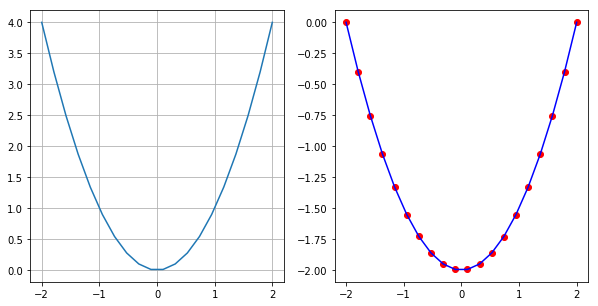

In [3]:
from scipy import integrate

x = np.linspace(-2, 2, 20)
y = x
y_int = integrate.cumtrapz(y, x, initial=0)
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x,y**2)
ax[1].plot(x, y_int, 'ro',x, 0.5 * (x**2-x[0]**2), 'b-')
ax[0].grid()
plt.show()

## Intégrales "impropres'' convergentes
Que faire quand, bien que l'intégrale converge :
* la fonction ne peut pas être évaluée en un de ces points ($\sin(x)/x$ en $x=0$)
* la fonction diverge en une de ces bornes ($1/\sqrt{x}$ en $x=0$)
* l'intégrale court jusqu'à une borne infinie ($\int_0^\infty {\rm e}^{-x}{\rm d}x $)

Pour les deux premiers points, en particulier le premier, un moyen de s'en sortir consiste à utiliser une **intégration dite ouverte** (par opposition à fermée...), i.e. plutôt que d'effectuer l'intégrale entre $a$ et $b$ inclus, on l'effectue **entre $a+h$ et $b-h$ inclus.}


Lorsqu'une borne est infinie, si la fonction chute suffisamment rapidement, on peut se contenter d'imposer une **borne supérieure "grande''** (à déterminer au cas par cas avec une étude de convergence).

On peut aussi recourir à un **changement de variable**, par exemple si $b\rightarrow\infty$ et $a>0$  :

\begin{equation}
\int_a^b f(x) dx = \int_{1/b}^{1/a}f\left(\frac{1}{t}\right) \frac{{\rm d}t}{t^2}
\end{equation}

ou encore

\begin{equation}
\int_a^b f(x) dx = \int_{\exp(-b)}^{\exp(-a)}f(-\ln t) \frac{{\rm d}t}{t}
\end{equation}


qui sont très aisés à mettre en place par le développeur...

## Aisé pour le développeur

Un outil général d'intégration des fonctions 1D existe dans le module ```scipy.integrate``` : ```quad``` (pour quadrature). Il prend comme argument : une fonction et ses bornes puis renvoie l'intégrale et la précision absolue sur cette intégrale.

In [4]:
from scipy.integrate import quad

#fonction x^2
def f(x):
	return x*x

a = 0 #borne inf de l'integration
b = 2 #borne sup de l'integration
print(quad(f,a,b))

(2.666666666666667, 2.960594732333751e-14)


La fonction ```quad``` fait appel sans le dire à des méthodes identiques ou similaires à celles développées dans le cours.


Astuce : pour les fonctions pythons extrêmement simples (ou à plusieurs paramètres), on peut utiliser la syntaxe ```lambda``` de python. Le code suivant est parfaitement équivalent au précédent :

In [5]:
from scipy.integrate import quad

#Corps du programme
a = 0 #borne inf de l'integration
b = 1 #borne sup de l'integration
f = lambda x: x*x #fonction x^2
print(quad(f,a,b))

(0.33333333333333337, 3.700743415417189e-15)


## A retenir
La précision d'une intégrale dépend de la **méthode utilisée**
* Riemann (milieu) : $O\left(\frac{(b-a)^3f''}{n^2}\right)$
* Trapèzes : $O\left(\frac{(b-a)^3f''}{n^2}\right)$
* Simpson : $O\left(\frac{(b-a)^5f^{(4)}}{n^4}\right)$
et du **pas d'intégration $h$**.

Les fonctions de la librairie ```scipy``` sont confortables pour les développeurs mais il ne faut jamais oublier qu'elles fournissent un résultat avec une certaine **précision** qui dépend entre autre de **l'échantillonnage} de la fonction.

### A vos TPs !